# Collaborative Filtering : Anime (with Surprise)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import KNNBasic

## The Datasets

In [2]:
rating = pd.read_csv("dataset/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [3]:
rating.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [4]:
rating.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
id                     5000 non-null object
dateAdded              5000 non-null object
dateUpdated            5000 non-null object
name                   5000 non-null object
asins                  5000 non-null object
brand                  5000 non-null object
categories             5000 non-null object
primaryCategories      5000 non-null object
imageURLs              5000 non-null object
keys                   5000 non-null object
manufacturer           5000 non-null object
manufacturerNumber     5000 non-null object
reviews.date           5000 non-null object
reviews.dateAdded      1052 non-null object
reviews.dateSeen       5000 non-null object
reviews.doRecommend    5000 non-null bool
reviews.id             29 non-null float64
reviews.numHelpful     5000 non-null int64
reviews.rating         5000 non-null int64
reviews.sourceURLs     5000 non-null object
reviews.text      

## EDA

### 1. Primary Categories 

In [6]:
primary_cat = rating['primaryCategories'].value_counts()
primary_cat

Electronics                    3276
Electronics,Hardware           1435
Office Supplies,Electronics     265
Electronics,Media                24
Name: primaryCategories, dtype: int64

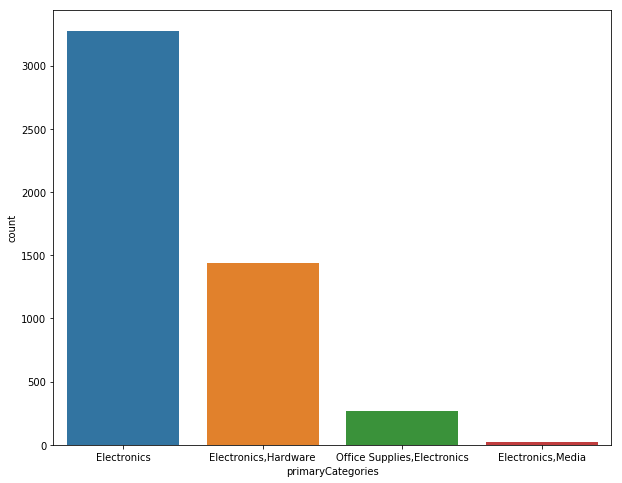

In [7]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=rating.primaryCategories)

### 2. Review Rating

In [8]:
rating.rename(columns={"reviews.rating":"reviewsRating"},inplace=True)

In [9]:
rev_rating = rating['reviewsRating'].value_counts()
rev_rating

5    3478
4    1208
3     197
1      63
2      54
Name: reviewsRating, dtype: int64

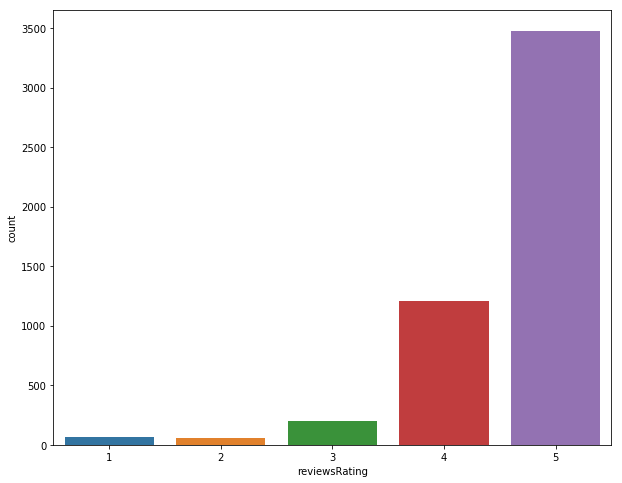

In [10]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="reviewsRating", data=rating)

### 3. Reviews Recommended

In [11]:
rating.rename(columns={"reviews.doRecommend":"reviewsRecommend"},inplace=True)

In [12]:
rev_rec = rating['reviewsRecommend'].value_counts()
rev_rec

True     4765
False     235
Name: reviewsRecommend, dtype: int64

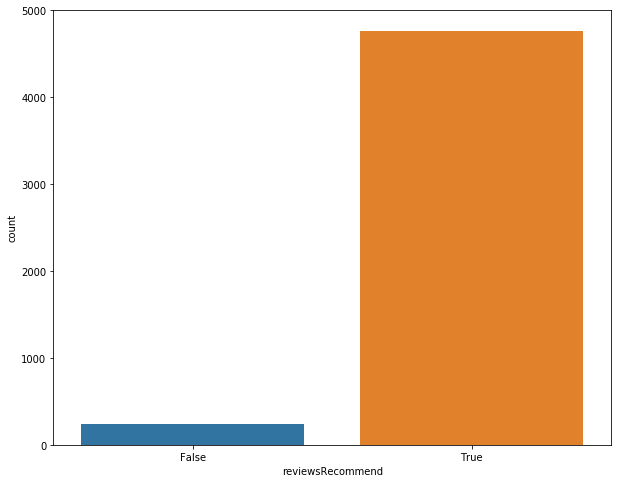

In [13]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="reviewsRecommend", data=rating)

### 4. Reviews Recommend with Primary Categories

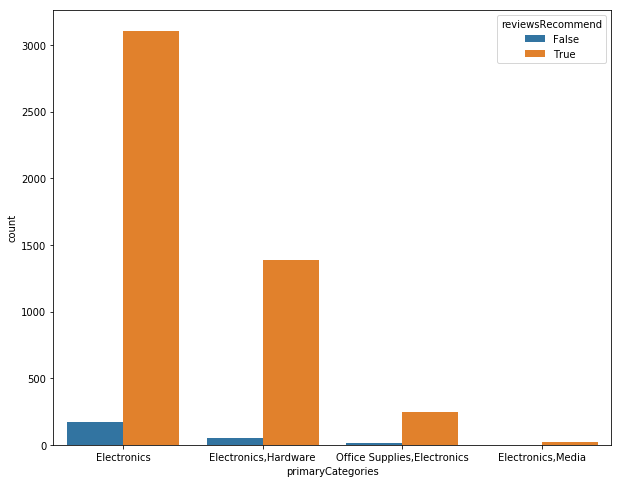

In [14]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="primaryCategories",hue="reviewsRecommend", data=rating)

### 5. Primary Category between Review Rating with Review Recommend

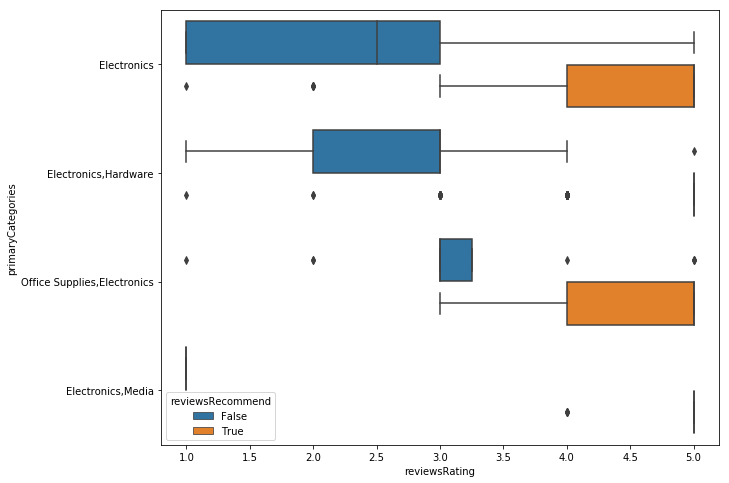

In [15]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.boxplot(x="reviewsRating", y="primaryCategories", hue="reviewsRecommend", data=rating)

## Preprocessing

In [16]:
# Cek apakah ada yang null pada dataset
rating.isnull().sum()

id                       0
dateAdded                0
dateUpdated              0
name                     0
asins                    0
brand                    0
categories               0
primaryCategories        0
imageURLs                0
keys                     0
manufacturer             0
manufacturerNumber       0
reviews.date             0
reviews.dateAdded     3948
reviews.dateSeen         0
reviewsRecommend         0
reviews.id            4971
reviews.numHelpful       0
reviewsRating            0
reviews.sourceURLs       0
reviews.text             0
reviews.title           13
reviews.username         0
sourceURLs               0
dtype: int64

In [17]:
# Dataset yang akan dipakai untuk trai test split dengan framework surprise
rating[['reviews.username','id','reviewsRating']]

,reviews.username,id,reviewsRating
0,llyyue,AVqVGZNvQMlgsOJE6eUY,3
1,Charmi,AVqVGZNvQMlgsOJE6eUY,5
2,johnnyjojojo,AVqVGZNvQMlgsOJE6eUY,4
3,Kdperry,AVqVGZNvQMlgsOJE6eUY,5
4,Johnnyblack,AVqVGZNvQMlgsOJE6eUY,5
5,rmwarriors,AVqVGZNvQMlgsOJE6eUY,5
6,LexieCrews,AVqVGZNvQMlgsOJE6eUY,5
7,merry,AVqVGZNvQMlgsOJE6eUY,4
8,STEF,AVqVGZNvQMlgsOJE6eUY,5
9,AEBY,AVqVGZNvQMlgsOJE6eUY,5


## Train_test_split & modelling from merge dataset (Rating)

### 1. Matrix Factorization with SVD

In [18]:
reader = Reader()
data = Dataset.load_from_df(rating[['reviews.username','id','reviewsRating']], reader)

In [19]:
#Train : Test = 80:20
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.20, random_state=50)

In [20]:
from surprise import SVD
algo_svd = SVD()
prediction_mf = algo_svd.fit(trainset).test(testset)

In [21]:
# Hasil prediksinya
prediction_mf

[Prediction(uid='boste03', iid='AVqkIhwDv8e3D1O-lebb', r_ui=5.0, est=4.575127533047092, details={'was_impossible': False}),
 Prediction(uid='Kevinandkalii', iid='AVqkIj9snnc1JgDc3khU', r_ui=5.0, est=4.673818896640155, details={'was_impossible': False}),
 Prediction(uid='PT53226', iid='AWFUWc8THh53nbDRF6YO', r_ui=4.0, est=4.652643065387147, details={'was_impossible': False}),
 Prediction(uid='kimb', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.321879250342157, details={'was_impossible': False}),
 Prediction(uid='Colleen', iid='AVph0EeEilAPnD_x9myq', r_ui=5.0, est=4.6348382494916285, details={'was_impossible': False}),
 Prediction(uid='Lintor', iid='AWFUWc8THh53nbDRF6YO', r_ui=5.0, est=4.652643065387147, details={'was_impossible': False}),
 Prediction(uid='Jays', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.4721563489168465, details={'was_impossible': False}),
 Prediction(uid='Squirl', iid='AWK8z0pOIwln0LfXlSxH', r_ui=5.0, est=4.742318551053265, details={'was_impossible': False}),
 Predict

In [22]:
# Tes rekomendasinya
recom_svd = algo_svd.predict(uid='Jays',iid='AWMjT0WguC1rwyj_rFh3')
recom_svd

Prediction(uid='Jays', iid='AWMjT0WguC1rwyj_rFh3', r_ui=None, est=4.763209060200868, details={'was_impossible': False})

## Evaluating

In [23]:
from surprise import accuracy

accuracy.mae(prediction_mf)
accuracy.fcp(prediction_mf)
accuracy.rmse(prediction_mf)

MAE:  0.5706
FCP:  0.3889
RMSE: 0.7918


0.7917707605494191

### 2. KNN with pearson similarity

In [24]:
sim_options = {'name': 'pearson_baseline','shrinkage': 0}
algo = KNNBasic(sim_options=sim_options)
algo_knn = KNNBasic(k=50, sim_options=sim_options)
prediction_knn = algo_knn.fit(trainset).test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [25]:
prediction_knn

[Prediction(uid='boste03', iid='AVqkIhwDv8e3D1O-lebb', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Kevinandkalii', iid='AVqkIj9snnc1JgDc3khU', r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='PT53226', iid='AWFUWc8THh53nbDRF6YO', r_ui=4.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='kimb', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.946977157104646, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='Colleen', iid='AVph0EeEilAPnD_x9myq', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Lintor', iid='AWFUWc8THh53nbDRF6YO', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='Jays', iid='AVpgdkC8ilAPnD_xsvyi', r_ui=5.0, est=4.60925, details={'was_impossible': True, 'reason': 'U

In [26]:
# Tes rekomendasinya
recom_knn = algo_knn.predict(uid='Jays',iid='AWMjT0WguC1rwyj_rFh3', r_ui=4.5)
recom_knn

Prediction(uid='Jays', iid='AWMjT0WguC1rwyj_rFh3', r_ui=4.5, est=4.60925, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

## Evaluating

In [27]:
accuracy.mae(prediction_knn)
accuracy.fcp(prediction_knn)
accuracy.rmse(prediction_knn)

MAE:  0.5753
FCP:  0.5641
RMSE: 0.8257


0.8256951342315226

# Finish